In [1]:
import ROOT as rt

Welcome to JupyROOT 6.28/00


In [2]:
load_path = "quick_tests/workspace/workspace_ggh_All_Zfit_no_e_cut_UL_calib_cat5.root"


In [3]:
file = rt.TFile.Open(load_path)

In [4]:
canvas = rt.TCanvas()
canvas.cd()
mass =  rt.RooRealVar("mh_ggh","mass (GeV)",100,85,99)
frame = mass.frame()

In [5]:
bwWidth = rt.RooRealVar("bwz_Width" , "widthZ", 2.5, 0, 30)
bwmZ = rt.RooRealVar("bwz_mZ" , "mZ", 91.2, 90, 92)
sigma = rt.RooRealVar("sigma" , "sigma", 2, 0.0, 5.0)

bwWidth.setConstant(True)
bwmZ.setConstant(True)

model1_1 = rt.RooBreitWigner("bwz", "BWZ",mass, bwmZ, bwWidth)

"""
Note from Jan: sometimes freeze n values in DCB to be frozen (ie 1, but could be other values)
This is because alpha and n are highly correlated, so roofit can be really confused.
Also, given that we care about the resolution, not the actual parameter values alpha and n, we can 
put whatevere restrictions we want.
"""
mean = rt.RooRealVar("mean" , "mean", 0, -5,5) # mean is mean relative to BW
sigma = rt.RooRealVar("sigma" , "sigma", 2, .2, 4.0)
alpha1 = rt.RooRealVar("alpha1" , "alpha1", 2, 0.01, 45)
n1 = rt.RooRealVar("n1" , "n1", 10, 0.01, 185)
alpha2 = rt.RooRealVar("alpha2" , "alpha2", 2.0, 0.01, 65)
n2 = rt.RooRealVar("n2" , "n2", 25, 0.01, 385)
model1_2 = rt.RooCrystalBall("dcb","dcb",mass, mean, sigma, alpha1, n1, alpha2, n2)

model1 = rt.RooFFTConvPdf("BWxDCB", "BWxDCB", mass, model1_1, model1_2)

mass.setBins(10000,"cache") # cache is repre of the varibale only used in FFT
mass.setBins(100) # bin to 100 bins otherwise, fitting with FFT conv is gonna take forever
mass.setMin("cache",50.5) 
mass.setMax("cache",130.5)

c = rt.RooRealVar("c", "c", -1.54, -10, -0.1)
model2 = rt.RooExponential("Exponential", "Exponential", mass,c)


[#1] INFO:Caching -- Changing internal binning of variable 'mh_ggh' in FFT 'BWxDCB' from 100 to 930 to improve the precision of the numerical FFT. This can be done manually by setting an additional binning named 'cache'.


In [6]:
import time

start = time.time()



# model3.fitTo(file.w.data("data_Zfit_no_e_cut_UL_calib_cat20"))
# rooDataset = file.w.data("data_Zfit_no_e_cut_UL_calib_cat12")
# model1.fitTo(rooDataset) # fitting on unbinned data is really slow,
#fitting directly to unbinned dataset is slow, so first make a histogram
roo_dataset = file.w.data("data_Zfit_no_e_cut_UL_calib_cat5")
data_hist = rt.RooDataHist("data_hist","binned version of roo_dataset", rt.RooArgSet(mass), roo_dataset)  # copies binning from mass variable
model1.fitTo(roo_dataset) # fitting on unbinned data is really slow,
end = time.time()
print(f"fitting elapsed time: {end - start}")

fitting elapsed time: 13.358410120010376
[#1] INFO:Eval -- RooRealVar::setRange(mh_ggh) new range named 'refrange_fft_BWxDCB' created with bounds [50.5,130.5]
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxDCB) creating new cache 0x5628bf67aae0 with pdf bwz_CONV_dcb_CACHE_Obs[mh_ggh]_NORM_mh_ggh for nset (mh_ggh) with code 0
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bwz_CONV_dcb_CACHE_Obs[mh_ggh]_NORM_mh_ggh_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (bwz)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha1       2.00000e+00  9.95000e-01    1.00000e-02  4.50000e+01
     2 alpha2 

[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxDCB) creating new cache 0x5628bf953050 with pdf bwz_CONV_dcb_CACHE_Obs[mh_ggh]_NORM_mh_ggh for nset (mh_ggh) with code 0
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bwz_CONV_dcb_CACHE_Obs[mh_ggh]_NORM_mh_ggh_Int[mh_ggh]) using numeric integrator RooIntegrator1D to calculate Int(mh_ggh)


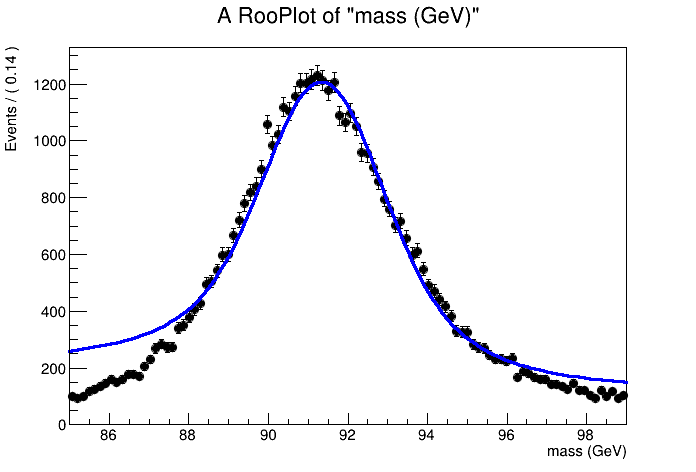

In [7]:

# file.w.pdf("Voigtian_ggh_All").plotOn(frame)
file.w.data("data_Zfit_no_e_cut_UL_calib_cat5").plotOn(frame)
# model3.plotOn(frame, rt.RooFit.LineColor(rt.kGreen))
# model1.plotOn(frame, rt.RooFit.LineColor(rt.kRed))
# model2.plotOn(frame, rt.RooFit.LineColor(rt.kBlue))
# model1_1.plotOn(frame, rt.RooFit.LineColor(rt.kRed))
# model1_2.plotOn(frame, rt.RooFit.LineColor(rt.kBlue))
model1.plotOn(frame, rt.RooFit.LineColor(rt.kBlue))

frame.Draw()
canvas.Update()
canvas.Draw()
